In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC

In [ ]:
mi_score = MIC(x.reshape(-1, 1),y.reshape(-1, 1))

In [ ]:
print(mi_score)

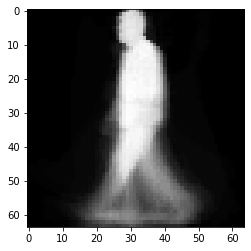

In [6]:
im_003_bs = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/full_walk_representations/090/003/nm-02.png",0)
plt.imshow(im_003_bs, cmap='gray')

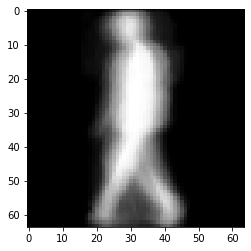

In [16]:
im_003_dl = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/representations_80/090/003/nm-02.png",0)
im_003_dl = cv2.resize(im_003_dl,(64,64))
plt.imshow(im_003_dl, cmap='gray')

In [14]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

0.6392353986582225


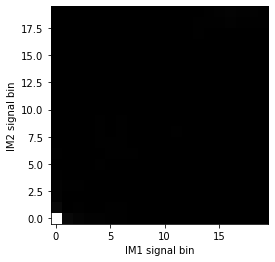

In [15]:
hist_2d, x_edges, y_edges = np.histogram2d(
    im_003_dl.ravel(),
    im_003_bs.ravel(),
    bins=20)

plt.imshow(hist_2d.T, origin='lower', cmap='gray')
plt.xlabel('IM1 signal bin')
plt.ylabel('IM2 signal bin')


print(mutual_information(hist_2d))